#  NLP (Text Mining)
Text Mining is the process of deriving meaningful information from natural language text.
Overall goal is to convert text into data for analysis via NLP
Natural Language Processing(NLP) is a part of computer science and artificial intelligence which deals with human languages.
NLP is a component of text mining that performs a special kind of linguistic analysis that essentially helps a machine “read” text. It uses a different methodology to decipher the ambiguities in human language

In [ ]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Text Mining Libraries

In [23]:
import nltk
import os
import nltk.corpus #  
from nltk.tokenize import word_tokenize # tokenization
# Passing the string text into word tokenize for breaking the sentences
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist   # Frequency of words
from nltk.stem import PorterStemmer   # Stemming

In [15]:
#nltk.download('punkt')  #download this NLP library once and then comment

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\du\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## Sample Text

In [16]:
text = "In Brazil they drive on the right-hand side of the road. Brazil has a  " + "large coastline on the eastern side of South America"
print(text)

In Brazil they drive on the right-hand side of the road. Brazil has a  large coastline on the eastern side of South America


['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

## Tokenisation
Tokenization is the first step in NLP. It is the process of breaking strings into tokens which in turn are small structures or units. Tokenization involves three steps which are breaking a complex sentence into words, understanding the importance of each word with respect to the sentence and finally produce structural description on an input sentence.

In [22]:
token = word_tokenize(text)
token
#for i in token : print(i, sep ='\t ')

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

text split into tokens. Words, comma, punctuations are called tokens.
### Finding frequency distinct in the text

In [24]:
# finding the frequency distinct in the tokens
fdist = FreqDist(token)
fdist
#‘the’ is found 3 times in the text, ‘Brazil’ is found 2 times in the text, etc.

FreqDist({'the': 3, 'Brazil': 2, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [25]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('Brazil', 2),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

## Stemming
Stemming usually refers to normalizing words into its base form or root form
Here, we have words waited, waiting and waits. Here the root word is ‘wait’. 
-There are two methods in Stemming namely, Porter Stemming (removes common morphological and inflectional endings from words) and Lancaster Stemming (a more aggressive stemming algorithm).

### Porter Stemmer

In [27]:
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("waiting")

'wait'

In [28]:
# Checking for the list of words; actual word and its stem/root
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word + ":" + pst.stem(word))

waited:wait
waiting:wait
waits:wait


### Lancaster Stemmer
Lancaster is more aggressive than Porter stemmer

In [30]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["giving", "given", "given", "gave"]
for word in stm :
 print(word+ ':' + lst.stem(word))

giving:giv
given:giv
given:giv
gave:gav


## Lemmatization
it is the process of converting a word to its base form. The difference between stemming and 
lemmatization is, lemmatization considers the context and converts the word to its meaningful
base form, whereas stemming just removes the last few characters, often leading to incorrect
meanings and spelling errors. For example, lemmatization would correctly identify the base
form of ‘caring’ to ‘care’, 
whereas, stemming would cutoff the ‘ing’ part and convert it to car.
Lemmatization can be implemented in python by using Wordnet Lemmatizer, 
Spacy Lemmatizer, TextBlob, Stanford CoreNLP

In [36]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')  #download this once and then comment
lemmatizer = WordNetLemmatizer() 

In [42]:
print('rocks :', lemmatizer.lemmatize('rocks')) 

rocks : rock


In [41]:
print('corpora :', lemmatizer.lemmatize('corpora'))

corpora : corpus


### Stop Words
“Stop words” are the most common words in a language like “the”, “a”, “at”, “for”, 
“above”, “on”, “is”, “all”. These words do not provide any meaning and are usually 
removed from texts. We can remove these stop words using nltk library

In [45]:
# importing stopwords from nltk library
from nltk import word_tokenize
#nltk.download('stopwords')  #download this library
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
print(text)

Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal.


In [46]:
text1 = word_tokenize(text.lower())  #all to lowercase
print(text1)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [47]:
stopwords = [x for x in text1 if x not in a]
print(stopwords)  # removed stopwords

['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


## Part of speech tagging (POS)
Part-of-speech tagging is used to assign parts of speech to each word of a given text (such as nouns, verbs, pronouns, adverbs, conjunction, adjectives, interjection) based on its definition and its context. There are many tools available for POS taggers and some of the widely used taggers are NLTK, Spacy, TextBlob, Standford CoreNLP, etc.

In [65]:
nltk.download('averaged_perceptron_tagger')  #download this once
text = "vote to choose a particular man or a group (party) to represent them in parliament"
#Tokenize the text
tex = word_tokenize(text)
print(tex)

['vote', 'to', 'choose', 'a', 'particular', 'man', 'or', 'a', 'group', '(', 'party', ')', 'to', 'represent', 'them', 'in', 'parliament']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\du\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [66]:
for token in tex:
    print(nltk.pos_tag([token]))

[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


## Named entity recognition
It is the process of detecting the named entities such as the person name, the location name, the company name, the quantities and the monetary value.

In [83]:
text = "Google’s CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event"
#importing chunk library from nltk
#nltk.download('maxent_ne_chunker')  #download this once
#nltk.download('words')   # download this once
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
#!pip install svgling  #install this library
print(text)
token = word_tokenize(text)

Google’s CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event


In [84]:
print(token)

['Google', '’', 's', 'CEO', 'Sundar', 'Pichai', 'introduced', 'the', 'new', 'Pixel', 'at', 'Minnesota', 'Roi', 'Centre', 'Event']


In [85]:
tags = nltk.pos_tag(token)
print(tags)

[('Google', 'NNP'), ('’', 'NNP'), ('s', 'VBD'), ('CEO', 'NNP'), ('Sundar', 'NNP'), ('Pichai', 'NNP'), ('introduced', 'VBD'), ('the', 'DT'), ('new', 'JJ'), ('Pixel', 'NNP'), ('at', 'IN'), ('Minnesota', 'NNP'), ('Roi', 'NNP'), ('Centre', 'NNP'), ('Event', 'NNP')]


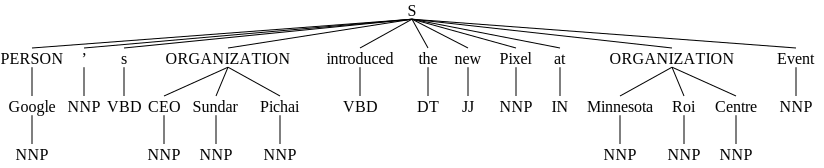

In [87]:
chunk = ne_chunk(tags)
chunk

## Chunking
Chunking means picking up individual pieces of information and grouping them into bigger pieces. In the context of NLP and text mining,
chunking means a grouping of words or tokens into chunks.

In [75]:
text = 'We saw the yellow dog'
token = word_tokenize(text)
tags = nltk.pos_tag(token)
reg = 'NP: {<DT>?<JJ>*<NN>}' 
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)

(S We/PRP saw/VBD (NP the/DT yellow/JJ dog/NN))


summarizes text preprocessing and covers the NLTK steps including Tokenization, Stemming, Lemmatization, POS tagging, Named entity recognition and Chunking.

## Links
https://www.kdnuggets.com/2020/05/text-mining-python-steps-examples.html